In [1]:
import json
import re
from tqdm import tqdm

In [2]:
with open("newsapec.json") as f:
    news_list = json.load(f)

In [3]:
len(news_list) # news number

9604

In [4]:
news_list[0] #first news data

{'title': 'BTS RM, 경주 APEC 기조연설자로 나선다',
 'author': None,
 'hostname': 'hani.co.kr',
 'date': '2025-10-27',
 'fingerprint': '7a6a656ab9fdbfaa',
 'id': None,
 'license': None,
 'comments': '',
 'raw_text': '기사를 읽어드립니다 0:00 광고 그룹 방탄소년단의 리더 알엠(RM)이 오는 29일 경주에서 열리는 아시아태평양경제협력체(APEC) 정상회의 부대 행사인 ‘아펙 시이오(APEC CEO) 서밋’에 기조연설자로 나선다. 27일 한겨레 취재 결과, 알엠은 서밋 2일 차인 29일 오후 3시5분부터 15분까지 약 10분간 문화 세션의 하나로 ‘아펙 지역의 문화창조산업과 케이(K)-컬처의 소프트파워’를 주제로 연설할 예정이다. 구체적인 발표 내용은 알려지지 않았다. 영어에 능숙한 알엠은 이번 연설에서 글로벌 재계 인사들을 대상으로 영어로 발표할 예정이다. 앞서 그는 유엔 총회와 미국 백악관 등 국제무대에서 영어로 연설한 바 있다. 광고 ‘아펙 시이오 서밋’은 21개 회원국 정상과 각국 기업인이 한자리에 모여 세계 경제의 주요 흐름과 혁신 산업의 방향을 논의하는 비즈니스 포럼이다. 올해 주제는 ‘비욘드, 비즈니스, 브리지’(Beyond, Business, Bridge)로, 케이팝 아티스트가 이 행사 연설자로 초청된 것은 이번이 처음이다. 한편, 방탄소년단이 속한 모회사 하이브는 이번 ‘아펙 시이오 서밋’의 공식 스폰서로 참여한다. 스폰서 기업 가운데 유일한 엔터테인먼트사로, 경주 예술의전당에 홍보 부스를 마련해 글로벌 비즈니스 현황을 소개하고, 산하 레이블 아티스트들의 성과와 케이팝 응원 문화를 상징하는 응원봉 등을 선보일 예정이다. 이정국 기자 jglee@hani.co.kr',
 'text': '기사를 읽어드립니다\n0:00\n광고\n그룹 방탄소년단의 리더 알엠(RM)이 오는 29일 경주에서 열리는 아시아태평양

In [5]:
documents = []
invalid_line_patterns = re.compile(
    r"무단\s*전재|배포\s*금지|Copyrights|관련기사|기사\s*제보|여러분의 제보|카카오톡\s*:s*"
)

for article in tqdm(news_list, mininterval=1):
    text = article["text"]

    lines = text.split("\n")
    filtered_lines = []

    for line in lines:
        line = " ".join(line.split()) #make space only one if there are many spaces

        # OOO 기자 패턴 제거
        line = re.sub(r"\w+ 기자", "", line) #change reporter  with space null. 
        # email 주소 제거
        line = re.sub(r"\w+@\w+\.\w+", "", line)
        # 뉴스에서 []는 [논산] [대구=뉴시스] 등 다양한 참조를 의미하므로 제거
        line = re.sub(r"\[.*\]", "", line)
        # (서울=연합뉴스) 같은 패턴 제거
        line = re.sub(r"\(.*=.*\)", "", line)
        # 2024.10.29/뉴스1 같은 패턴 제거
        line = re.sub(r"\d{4}\.\d{2}\.\d{2}/.*\b", "", line)

        # 공백 제거
        line = " ".join(line.split()) #remove spaces again

        if invalid_line_patterns.search(line):
            # 무단전재, 배포금지 등이 포함된 문장 이후 문장들은 제외
            break #if meet this pattern then break, dont see any thing below that

        # 한국어가 50자 이상 포함된 경우만 포함
        num_korean_chars = len(re.findall(r"[ㄱ-ㅎ가-힣]", line))
        if num_korean_chars >= 10:
            filtered_lines.append(line) #if word long append in line

    text = "\n".join(filtered_lines) #join again back 
    # 한국어가 10자 이상 포함된 경우만 포함
    num_korean_chars = len(re.findall(r"[ㄱ-ㅎ가-힣]", text))
    if num_korean_chars >= 50:
        documents.append(text)

# 중복 제거
documents = list(set(documents)) #put in set to remove duplicate and put back in list

100%|██████████| 9604/9604 [00:06<00:00, 1509.80it/s]


In [6]:
len(documents) #filtered

7880

In [ ]:
documents[0] #format type- string

'트럼프 방한 일정 마무리…에어포스원 탑승\n시진핑 주석, \'훙치\' 탑승한뒤 곧바로 경주로\n김해국제공항 공군 제5공중기동비행단 의전시설 나래마루에서 열린 도널드 트럼프 미국 대통령과 시진핑 중국 국가주석 간 정상회담이 약 1시간 40분 만에 종료됐다.\n트럼프 대통령과 시 주석은 30일 오전 김해공항 공군기지 의전실인 나래마루에서 만나 약 1시간 40분간 회담을 가진 뒤 종료했다고 중국중앙TV(CCTV)가 보도했다. 공식 회담이 종료된 후 회담장 밖으로 나와 두 정상은 나란히 서서 악수했다.\n트럼프 대통령은 시 주석에게 귓속말했고, 시 주석은 고개를 끄덕였다. 양국 정상은 차량에 탑승한 후 회담장을 떠났다.\n이후 트럼프 대통령은 1시께 미국 대통령 전용기인 에어포스원에 탑습해 미 워싱턴으로 향했다. 1박 2일간의 방한 일정을 마친 트럼프 대통령은 비행기 문에 들어서며 손을 흔들고 주먹을 휘두르면서 "고맙다"고 말했다.\n시 주석도 정상회담을 마친 후 의전차량인 훙치(紅旗)에 탑승해 김해공항에서 경주로 출발했다.\n한편 트럼프 대통령과 시 주석의 대좌는 트럼프 집권 2기 들어 처음이다. 2019년 6월 일본 오사카에서 열린 주요 20개국(G20) 정상회의 계기에 만난 이후 6년 4개월여 만이다.'

In [9]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from collections import Counter

stopword = Stopwords()
kiwi = Kiwi()

permitted_tag = set(["NNG", "NNP", "VA", "VV", "SL"])

document_token_list =[]
word_freq = Counter()

for doc in tqdm(documents, mininterval=1):
    tokens=[]
    for token in kiwi.tokenize(doc, stopwords=stopword):
        if token.tag in permitted_tag and len(token.form) > 1:
            tokens.append(token.form)

    if len(tokens) >= 10:
        document_token_list.append((tokens, doc))
        word_freq.update(tokens)



100%|██████████| 7880/7880 [05:24<00:00, 24.26it/s]


In [ ]:
kiwi.tokenize(documents[0], stopwords=stopword)

In [10]:
print(len(document_token_list))
print(len(word_freq))

7880
32336


In [ ]:
for word, freq in word_freq.most_common(50):
    print(word, freq)

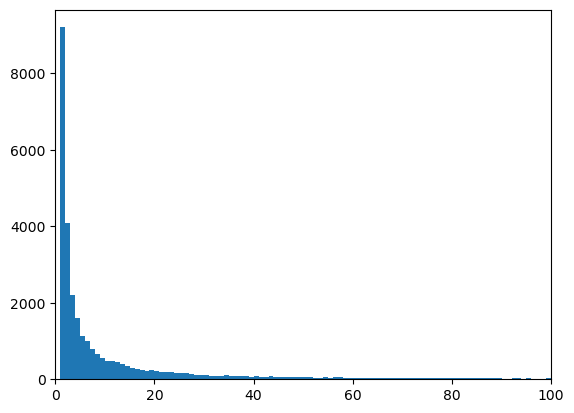

In [13]:
import matplotlib.pyplot as plt

plt.hist(word_freq.values(), bins=100, range=(0,100))
plt.xlim(0,100)
plt.show()

In [18]:
#make dict based on vocab
##vocab = [word for word, freq in word_freq.most_common(10000)]
#or
vocab = sorted([word for word, freq in word_freq.items() if freq >= 10]) 
word2idx = {word: index for index, word in enumerate(vocab)}

print(len(vocab))

11110


In [20]:
from scipy.sparse import dok_matrix
#m [r index, c index,] = value - in dok_matrix save like this in dict
import numpy as np

dtm = dok_matrix((len(document_token_list), len(vocab)), dtype=np.float32)

for document_idx, (tokens,doc) in enumerate(tqdm(document_token_list)):
    for token in tokens:
        try: #to check if there are key in word2indx if not then key error pass
            word_index = word2idx[token]
            dtm[document_idx, word_index] += 1
        except KeyError:
            pass

dtm = dtm.tocsr() # make calc dok more faster
print(dtm.shape)

100%|██████████| 7880/7880 [00:49<00:00, 158.40it/s]


(7880, 11110)


In [21]:
#tf idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf_matrix = tfidf.fit_transform(dtm)


In [ ]:
from sklearn.decomposition import NMF

num_topics = 10
nmf = NMF(num_topics, max_iter=1000, shuffle=True, random_state=42)

w = nmf.fit_transform(tfidf_matrix) #doc, topic
h = nmf.components_ #vocab, topic

print(w.shape, h.shape)

(7880, 10) (10, 11110)


In [27]:
for topic_index in range(num_topics):
    top_word_indices = h[topic_index].argsort()[::-1][:20] #select index after sort ascending, the index stay same just select based on increasing
    top_word = [vocab[index] for index in top_word_indices]

    print(f"topic#{topic_index}: {','.join(top_word)}")
    print()

topic#0: 미국,관세,트럼프,협상,한미,회담,북한,중국,잠수함,한국,대통령,합의,투자,타결,정상,안보,무역,건조,외교,추진

topic#1: AI,엔비디아,기술,데이터,산업,GPU,기업,구축,한국,혁신,협력,인프라,투자,반도체,센터,글로벌,기반,네이버,개발,피지컬

topic#2: 경주,도시,시민,문화,APEC,관광,행사,회의,정상,경북,세계,경주시,경북도,성공,개최,국제,이번,신라,운영,역사

topic#3: 회장,CEO,서밋,그룹,참석,기업,최태원,이재용,젠슨 황,글로벌,기업인,APEC,삼성전자,정의선,행사,RM,연설,총수,엔비디아,부회장

topic#4: 국민,대통령,국회,민주당,대표,재판,성과,조사,정부,의원,예산,원내,국정,외교,이재명,지지,중지,평가,예산안,정쟁

topic#5: 수소,현대차그룹,모빌리티,에너지,버스,전기,SK이노베이션,생산,PBV,글로벌,넥쏘,기술,부회장,미래,LNG,산업,환경,전시,서밋,CEO

topic#6: APEC,인구,협력,선언,무역,공동,변화,성장,경제,회원,구조,채택,AI,번영,회의,대응,정상,혁신,경주,창조

topic#7: 뷰티,브랜드,선물,올리브,푸드,제품,LG생활건강,체험,배우자,화장품,제공,한국,글로벌,환유고,더후,환유,패키지,선보이,식품,전통

topic#8: 지드래곤,공연,만찬,환영,차은우,무대,문화,가수,APEC,영상,홍보,정상,대사,음악,아티스트,호텔,RM,한국,회의,전통

topic#9: 대통령,총리,정상,회담,주석,중국,다카이치,일본,관계,양국,시진핑,회의,트럼프,방한,이재명,국가주석,일정,경주,황남빵,협력



<function matplotlib.pyplot.show(close=None, block=None)>

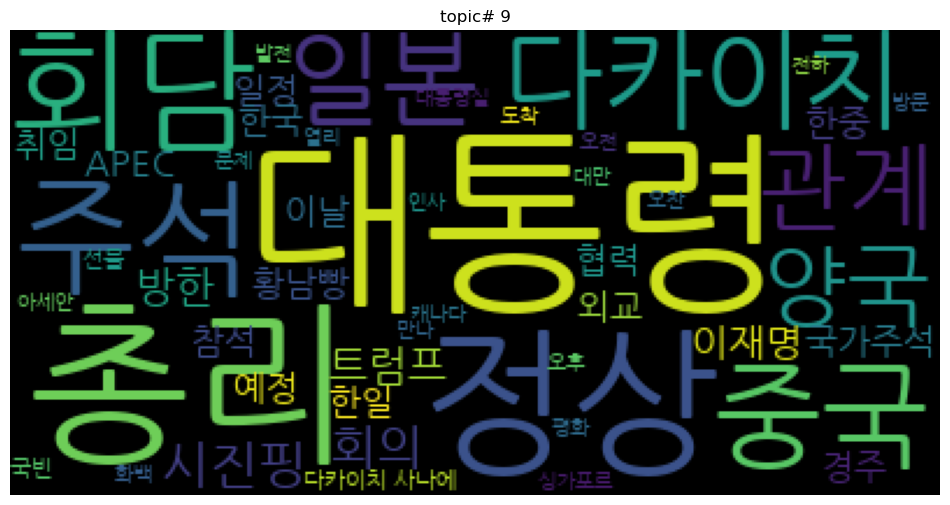

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#dic word 가중치
num_top_words = 50
top_word_indices = h[9].argsort()[::-1][:num_top_words]

word_weight = {
    vocab[word_index]:h[topic_index, word_index] for word_index in top_word_indices
}

wordcloud = WordCloud(
     font_path='C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf',
     prefer_horizontal=1.0,
     background_color="black",
     margin=1,
)

wordcloud.generate_from_frequencies(word_weight)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"topic# {topic_index}") #topic 9 
plt.show

In [ ]:
for topic_index in range(num_topics):
    top_document_indices = w[:, topic_index].argsort()[::-1][:3]

    print(f"Topic #{topic_index}:")
    for document_idx in top_document_indices:
        print(f"document#{document_idx}: {document_token_list[1][:100]}")

    print()

Topic #0:
document#6914: (['방탄소년단', '리더', 'RM', '가족', '모습', '공유', '눈길', '지나', 'RM', 'SNS', '계정', '가족', '촬영', '사진', '업로드', '스튜디오', '촬영', '보이', '사진', '촬영', '게시', '보이', '공개', '사진', 'RM', '가족', '서로', '모습', '가족', '드러내', '편안', '자연', '표정', '부모', '환하', '미소', '여동생', '모습', '인상', 'RM', '여동생', '닮은꼴', '남매', '유명', '이번', '사진', '붕어빵', '비주얼', '남매', '특별', '케미', '보이', '가족', '트레이닝복', '포즈', '취하', '가족', '유니폼', '떠올리', '지퍼', '올리', '포즈', '분위기', '연출', 'RM', '속하', '방탄소년단', '내년', '상반기', '완전체', '컴백', '목표', '준비', '작업', '진행', '관련', 'RM', '지난달', '경북', '경주시', '알천북로', '경주', '예술', '전당', '개최', 'APEC', 'CEO', '서밋', '문화', '세션', '가수', '최초', '기조', '연설', '글로벌', '아티스트', '위상', '입증'], "방탄소년단 리더 RM이 따뜻한 가족의 모습을 팬들과 공유해 눈길을 끌고 있습니다.\n지난 5일 RM은 SNS 계정에 가족과 함께 촬영한 사진을 업로드했습니다. 스튜디오에서 촬영된 것으로 보이는 사진을 직접 촬영해 게시한 것으로 보입니다.\n공개된 사진에서 RM과 가족들은 서로의 손을 꼭 잡은 모습으로 따뜻한 가족애를 드러냈습니다.\n편안하고 자연스러운 표정의 부모님과 환한 미소를 짓고 있는 여동생의 모습이 인상적이었는데요.\n특히 RM과 여동생은 닮은꼴 남매로 유명한데, 이번 사진에서도 '붕어빵' 같은 비주얼로 친남매만의 특별한 케미를 보여주었습니다.\n또 다른 컷에서는 가족 네 명 모두 트레이닝복을 입고 포즈를 취했

In [30]:
#시각화
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, max_iter=1000, random_state=42, n_jobs=-1)
w2 = tsne.fit_transform(w) #reduce dimension 


In [31]:
w2.shape

(7880, 2)

In [32]:
# 추후 시각화 관련 코드
from collections import defaultdict
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import Category10
from bokeh.models import HoverTool, ColumnDataSource

output_file("t-sne.html")

topic_idx_per_document = w.argmax(axis=1)
document_idx_per_topic = defaultdict(list)

source_per_topic = {}
for doc_idx, topic_idx in enumerate(topic_idx_per_document):
    document_idx_per_topic[topic_idx].append(doc_idx)
    source_per_topic[topic_idx] = ColumnDataSource(
        data=dict(
            x=w2[document_idx_per_topic[topic_idx], 0],
            y=w2[document_idx_per_topic[topic_idx], 1],
            text=[
                document_token_list[doc_idx][1][:100]
                for doc_idx in document_idx_per_topic[topic_idx]
            ],
        )
    )
    
p = figure(title="t-SNE scatter plot")
p.width = 960
p.height = 720
p.add_tools(HoverTool(tooltips=[("기사", "@text")], attachment="right"))
for topic_idx, source in source_per_topic.items():
    p.scatter(
        x="x",
        y="y",
        source=source,
        size=5,
        fill_alpha=0.5,
        legend_label=f"Topic #{topic_idx}",
        color=Category10[10][topic_idx],
    )

p.legend.location = "top_right"
show(p)